# DMV-TEST - LOGISTIC REGRESSION

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.style.use("ggplot")
%matplotlib inline

In [2]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

In [20]:
data = pd.read_csv("DMV_Written_Tests.csv")

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
DMV_Test_1    100 non-null float64
DMV_Test_2    100 non-null float64
Results       100 non-null int64
dtypes: float64(2), int64(1)
memory usage: 2.4 KB


In [25]:
scores = data[["DMV_Test_1","DMV_Test_2"]].values
result = data["Results"].values
data.head()

,DMV_Test_1,DMV_Test_2,Results
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


### Visualize the Data
---

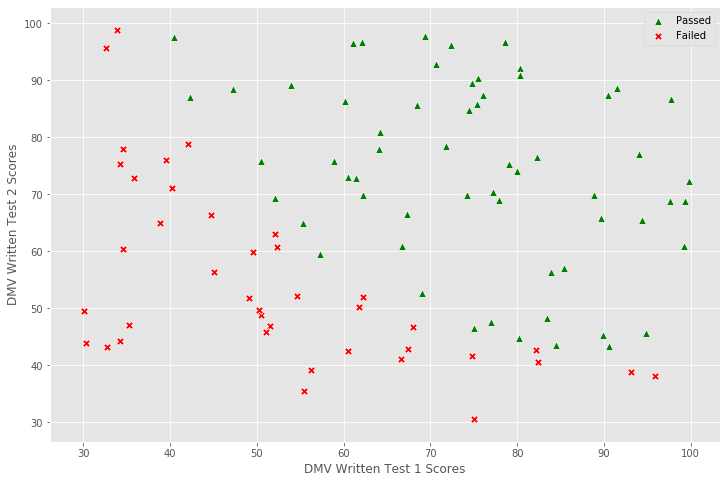

In [41]:
passed = (result == 1).reshape(100,1)
failed = (result == 0).reshape(100,1)

ax = sns.scatterplot(x = scores[passed[:, 0], 0], 
                     y = scores[passed[:, 0], 1],
                    marker = "^",color = 'green',s=60)

sns.scatterplot(x = scores[failed[:, 0], 0], 
                     y = scores[failed[:, 0], 1],
                    marker = "X",color="red",s=60)

ax.set(xlabel = "DMV Written Test 1 Scores", ylabel = "DMV Written Test 2 Scores")
ax.legend(['Passed','Failed'])
plt.show()

Define the Logistic Sigmoid Function $\sigma(z)$
---

$$ \sigma(z) = \frac{1}{1+e^{-z}}$$

In [70]:
def logistic_function(x):
    return 1/(1 + np.exp(-x))

In [72]:
logistic_function(1)

0.7310585786300049

### Compute the Cost Function $J(\theta)$ and Gradient
---

The objective of logistic regression is to minimize the cost function

$$J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [ y^{(i)}log(h_{\theta}(x^{(i)})) + (1 - y^{(i)})log(1 - (h_{\theta}(x^{(i)}))]$$

where the gradient of the cost function is given by

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$$

In [133]:
def compute_cost(theta, x, y):
    m = len(y)
    y_pred = logistic_function(np.dot(x,theta))
    error = (y*np.log(y_pred)) + (1 - y) * np.log(1 - y_pred)
    cost = -1/m * sum(error)
    gradient = 1/m * np.dot(x.T, (y_pred - y))
    return cost[0], gradient

###  Cost and Gradient at Initialization
---

In [147]:
mean_scores = np.mean(scores,axis=0)
std_scores = np.std(scores,axis=0)
scores = (scores - mean_scores)/std_scores


rows = scores.shape[0]
cols = scores.shape[1]

X = np.append(np.ones((rows, 1)),scores,axis = 1)
y = result.reshape(rows, 1)


theta_init = np.zeros((cols+1, 1))
cost, gradient = compute_cost(theta_init, X, y)

print("Cost at initialization", cost)
print("Gradient at initialization", gradient)

[[0.]
 [0.]
 [0.]]
Cost at initialization 0.693147180559946
Gradient at initialization [[-0.1       ]
 [-0.28122914]
 [-0.25098615]]


### Gradient Descent
---

Minimize the cost function $J(\theta)$ by updating the below equation and repeat until convergence
$\theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}$ (simultaneously update $\theta_j$ for all $j$)

In [148]:
def gradient_descent(x, y, theta, alpha, iterations):
    costs = []
    for i in range(iterations):
        cost, gradient = compute_cost(theta, x, y)
        theta -= (alpha * gradient)
        costs.append(cost)
    return theta, costs

In [149]:
theta, costs = gradient_descent(X, y, theta_init, 1, 200)

In [152]:
print("Theta after running gradient descent: ", theta)
print("Resulting cost: ", costs[-1])

Theta after running gradient descent:  [[1.50850586]
 [3.5468762 ]
 [3.29383709]]
Resulting cost:  0.2048938203512014


### Plotting the Convergence of $J(\theta)$
---

Plot $J(\theta)$ against the number of iterations of gradient descent:

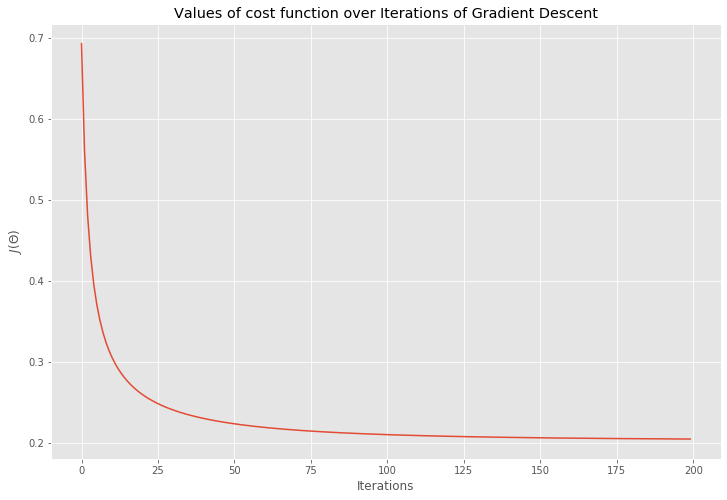

In [122]:
plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("$J(\Theta)$")
plt.title("Values of cost function over Iterations of Gradient Descent")
plt.show()

### Plotting the decision boundary
---

$h_\theta(x) = \sigma(z)$, where $\sigma$ is the logistic sigmoid function and $z = \theta^Tx$

When $h_\theta(x) \geq 0.5$ the model predicts class "1":

$\implies \sigma(\theta^Tx) \geq 0.5$

$\implies \theta^Tx \geq 0$ predict class "1" 

Hence, $\theta_1 + \theta_2x_2 + \theta_3x_3 = 0$ is the equation for the decision boundary, giving us 

$ x_3 = \frac{-(\theta_1+\theta_2x_2)}{\theta_3}$

[[1.50850586]
 [3.5468762 ]
 [3.29383709]]
[ 1.52124886 -2.35923495]


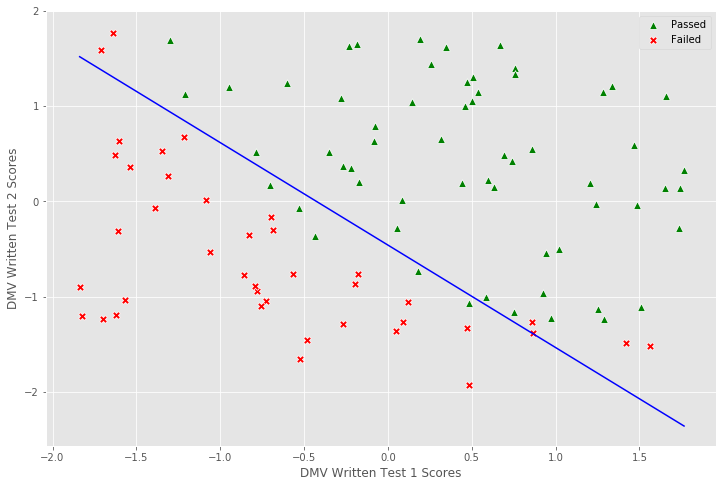

In [161]:
print(theta)
print(-(theta[0] + theta[1] * x_boundary)/theta[2])
ax = sns.scatterplot(x = X[passed[:, 0], 1], 
                     y = X[passed[:, 0], 2],
                    marker = "^",color = 'green',s=60)

sns.scatterplot(x = X[failed[:, 0], 1], 
                y = X[failed[:, 0], 2],
                marker = "X",color="red",s=60)

ax.set(xlabel = "DMV Written Test 1 Scores", ylabel = "DMV Written Test 2 Scores")
ax.legend(['Passed','Failed'])

x_boundary = np.array([np.min(X[:, 1]), np.max(X[:, 1])])
y_boundary = -(theta[0] + theta[1] * x_boundary)/theta[2]

sns.lineplot(x = x_boundary, y = y_boundary, color = "blue")
plt.show()

### Predictions using the optimized $\theta$ values
---

$h_\theta(x) = x\theta$

In [124]:
def predict(theta, x):
    results = x.dot(theta)
    return result > 0

In [160]:
p = predict(theta, X)
print("Trainning accuracy: ", sum(p==y)[0], "%")

Trainning accuracy:  40 %


In [126]:
test = np.array([50, 79])
test = (test - mean_scores)/std_scores
test = np.append(np.ones(1), test)
probability = logistic_function(test.dot(theta))
print("A person who scores 50 and 79 on their DMV written tests have a ", np.round(probability[0], 2), "probability of passing")

A person who scores 50 and 79 on their DMV written tests have a  1.0 probability of passing
